<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/main/lesson%203%20-%20Neural%20Networks/Intro_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks
![CNN](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)


## What are Convolutional Neural Networks (CNNs)?
A Convolutional Neural Network is a type of nerual network and Deep Learning algorithm that has been very popular in the last 10 years for its great involvement in improving Computer Vision (CV). They are excellent at classifying objects in an images that are being implemented in many areas, especially Medicine!

## How are CNNs contributing to Medicine?
Convolutional Neural Networks (CNNs) are frequently used to help doctors identify cancer and other diseases in medical images of patients, as they have proven to be nearly as accurate as a team of medical experts at diagnosing patients. This tech enables doctors to provide faster and better treatment, cutting a lot of time out of the diagnosis process, and saving lives as a result. 

CNNs are being studied and improved at the best medical universities around the world, for the hope of having CNNs being applied for the diagnosis process especially in areas where medical specialists are rare.

## What is different between a CNN and a normal Neural Network?
The main difference between these two algorithms is in how they learn features. Specifically, the difference occurs in the *Feature Learning* section from the CNN image above. In that section, we see that an image is being inserted at the input and it goes through a process where information is being picked from the image then summerized through **Convolutional Layers**. The information that is being picked are features in the image, such as the lights, tire, and shape of the car in the image. The reason it is called *Feature Learning* is because the way it looks for features in the images is automized as well, therefore the weights used in the convolutional layers are being trained and improved overtime.

You can also see that the input image gets smaller overtime, which is good since we are wanting to gather the most important features. This action of reducing the image down to its most significant features is called *encoding*. So when we use CNNs in this way, we are *encoding* the data in the images to be used for classifying whether an image contains a disease or not.

The *Classification* section of the CNN is just a normal (linear) Neural Network where the encoded features are learned to then give predictions at the end. The encoded features are flattened because the flattened features will be the input of the input layer. So you can see that a CNN is just a special type of Neural Network where it learns to get the most important information from the images.

## Loading the data from Kaggle

[Click here to access the dataset](https://www.kaggle.com/preetviradiya/covid19-radiography-dataset)

If you do not have an account with Kaggle, please make an account with them.

After making an account, you need to download a *kaggle.json* file on your local machine that provides the api to download the dataset.

To download this file follow the instructions below:
1. Click on your account in the top right
2. Click account settings
3. Scroll down to the 'API' section
4. Click 'Create New API Token' then it should download

The *kaggle.json* file is needed when it asks you to upload a file below before it downloads the dataset to this Colab.

In [ ]:
from google.colab import files
from IPython.utils import io
import os
files.upload()
os.system("mkdir -p ~/.kaggle")
os.system("cp kaggle.json ~/.kaggle/")
os.system("chmod 600 ~/.kaggle/kaggle.json")
!kaggle datasets download -d preetviradiya/covid19-radiography-dataset
with io.capture_output() as captured:
  !unzip covid19-radiography-dataset.zip && rm covid19-radiography-dataset.zip

Saving kaggle.json to kaggle.json
100% 744M/747M [00:10<00:00, 65.2MB/s]
100% 747M/747M [00:10<00:00, 72.4MB/s]


## Looking at the distrubition of our classes

The reason to look at the distribution is to understand how the number of samples per class can skew the predictions of the model. We see that their is an overwelming amount of normal X-Ray images that is greater than the other categories.

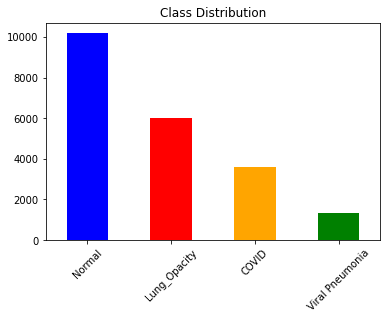

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

dataframe = pd.read_csv("/content/metadata.csv")
dataframe['label'].value_counts().plot.bar(color=['b', 'r', 'orange', 'g'])
plt.xticks(rotation=45)
plt.title('Class Distribution')
plt.show()

## Data Preparation
Just as our other projects/lessons, image data needs to be prepared to be used with PyTorch. One thing you might see different is the inclusion of PyTorch's [*Dataset*](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) and [*Dataloader*](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) objects. These two classes allow us to easily pair images with their labels that is iterable through a for-loop to get a single batch of data, which we customize. Our data is organized by the name of the folders having the name of the class that each subdirectory image belongs to. Because of this we use [*ImageFolder*](https://pytorch.org/vision/stable/datasets.html#imagefolder) that returns a PyTorch Dataframe ready to be loaded into dataloaders.

## Image Processing
If you remember from the past lessons where we used the *MNIST* dataset, each image was flattened as input into the neural network, which is an example of image processing but we didn't get into other transformations. PyTorch has many built-in image transformations that are very helpful for the performance of Convolutional Neural Networks. These are my favorites below:

1. [Resize](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize): Resizes the images to a desired size while keeping its aspect ratio.
2. [Center Crop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.CenterCrop): Crops an image in the center to the desired size (Height x Width)
3. [Random Resized Crop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomResizedCrop): This takes a random crop of your image with a random aspect ratio, then resizes the random crop to your desired size. This is helpful for getting different varation of objects in your images that it has to predict for.
4. [Random Horizontal Crop](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomHorizontalFlip): Flips images horizontally with a given probability that you provide. This is really helpful to make sure the CNN learns features in the images that are influenced by the location inside the images. **This project does not use it because it is concievable that disease can effect certain areas of the lungs, therefore we want the CNN to learn features that are related to location.**
6. [Random Rotation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation): This randomly rotates an image given your desired degrees in the range (-degrees, +degrees).
5. [Grayscale](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Grayscale): This converts colored images to black-and-white images, this is helpful if you want to do make your data smaller that will make the training process faster and will hold less memory in your machine.
6. [ColorJitter](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ColorJitter): This randomly changes the brightness, contrast, saturation and hue of each image. This brings some variation to the color of the images which can be helpful to have the CNN generalize the learning process.
7. [Padding](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Pad): This adds a border layer around the image with a number of your choice (default is 0) which can be helpful when constructing your Convolutional Layers.

You will see we only used the transformations Resize and ColorJitter below, we only used these because this dataset contains X-Ray images of infected lungs and it would be very important to keep the images as they are based on the assumption that diseases may effect different areas of the lungs. Therefore any transformations that transform the images based on location may inhibit the learning process of the model. The images were resized for the purpose of constructing the Convolutional Layers of the CNN, and changing the contrast randomly can perhaps highlight some infected areas in the images that the CNN can learn. 

In [ ]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

root = "/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"

# ImageNet means and stds to normalize images in entire dataset
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)

# Add more transforms tomorrow
transforms = transforms.Compose([
    # Image size is being resized to 3x224x224
    transforms.Resize(224),
    # Contrast Factor is being selected randomly between [0.5, 1.5]
    transforms.ColorJitter(contrast=0.5),
    # Converting images to PyTorch tensors
    transforms.ToTensor(),
    # Normalizing images with Means and STDs of ImageNet
    transforms.Normalize(means, stds)
])

# Using ImageFolder to read in the images with their labeled folders
dataset = ImageFolder(root, transform=transforms)

# Calculating the amount of images to split the dataset
trainToTestRatio = 0.8
trainSize = int(trainToTestRatio * len(dataset))
testSize = len(dataset) - trainSize

# Calculating the amount to split the training set into validation set
valSize = int(trainSize * 0.1) # Taking 10% of training data
trainSize = trainSize - valSize # Updating the amount of training data

# Splitting Data
training_data, val_data, testing_data = torch.utils.data.random_split(dataset, lengths=[trainSize, valSize, testSize])

# Loading Data
batch_size = 16

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

# Using dictionaries to easily access all the dataloaders and datasets
loaders = {'train':train_dataloader, 'valid':val_dataloader, 'test':test_dataloader}
datasets = {'train':training_data, 'valid':val_data, 'test':testing_data}

print("These are the classes:", dataset.class_to_idx)

These are the classes: {'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


In [ ]:
import torchvision.transforms.functional as F

# Function to reverse normalization of the images
def unNormalizeTensor(tensor, means, stds):
  tensor_duplicate = tensor.detach().clone()
  for channel, mean, std in zip(tensor_duplicate, means, stds):
    channel.mul_(std).add_(mean)
  return tensor_duplicate

# Printing the dimensions of each batch
images, labels = next(iter(train_dataloader))
print("Batch Image Dimensions:", images.size())
print("Batch Label Dimensions:", labels.size())

Batch Image Dimensions: torch.Size([16, 3, 224, 224])
Batch Label Dimensions: torch.Size([16])


### Images without Normalization


Images without Normalization:


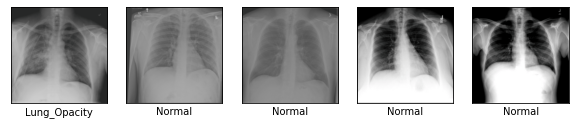

In [ ]:
# Printing images and their labels
print("\nImages without Normalization:")
idx_to_class = {value:key for key,value in dataset.class_to_idx.items()}
plt.figure(figsize=(10, 9))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = F.to_pil_image(unNormalizeTensor(images[i], means, stds))
  plt.imshow(image)
  plt.xlabel(idx_to_class[labels[i].item()])

### Images with Normalization

You can see that normalizing the data can enhance some features in the lungs. And it looks pretty cool!


Images with Normalization:


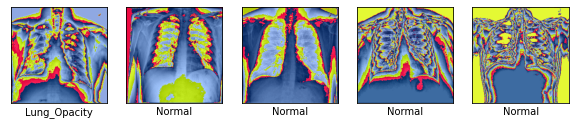

In [ ]:
print("\nImages with Normalization:")
plt.figure(figsize=(10, 9))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = F.to_pil_image(images[i])
  plt.imshow(image)
  plt.xlabel(idx_to_class[labels[i].item()])

## Constucting the Convolutional Neural Network

### Convolutional Layers
![Convolutional Process](https://miro.medium.com/max/1838/1*KtX_mPTQqzIQOJIGyPX1AQ.gif)

The GIF above shows the Convolutional Process when learning features from the images. The input is an image with 3 Color Channels for RGB, and the filters or kernels are scanning across it gathering information. There is a lot of customizability through hyperparameters.

The Three Hyperparameters:
1. Kernel Size: The Kernels above is a 2-D matrix or 2-D array which often have a squared dimension (i.e., Height = Width) with weights inside them that are trainable (i.e., our algorithm can learn the best weights for the problem we want to solve). Kernels are responsible of finding features inside an image and condensing that information in the output, that is why they scan over the image. If you use a small kernel size, you retain a lot of information and reduce the memory cost of storing the kernal weights. On the other hand, if you have a larger kernel size, you generalize a lot of information in the image and reduce the output size of the learned features but require more memory to store the kernal weights. In this GIF, the kernel size is 3, since it is 3x3. So this would be considered a small kernal size.

2. Stride: The number of pixels to hop between to scan the image. For example, when the stride is 1, the kernel only moves to the next right pixel each scan, as shown in the GIF. But if stride is two, the filter moves two pixels to the right. The greater stride you have, the few smaller the output feature size will be. Sometimes, people increase the stride to reduce the memory required by the CNN model.
 

![padding](https://miro.medium.com/max/1600/0*TsOwf6kzkUV8LZBX)
3. Padding: Padding as described above in the image processing section is used to add a border around the image (think blank pixels around the border of the image). This can be used to ensure that the shape of the input is compatible with the CNN model. 

The image above demonstrates how the output features are effected by different padding and stride settings, keeping a constant kernal size of 3x3. On the left, no padding is used and the stride is 1(`padding = 0, stride=1`). The middle example shows that the output feature size increase to 3x3 when padding is 1 (i.e., adding a border of blank pixels to the input) stride is 2. The benefit of having padding, is that you can retain information of the borders while also retaining the dimensions of the input.

The outputs of the convolutional layers are called *Feature Maps*, and you can control the number of features maps that a convolutional layer produces by adjusting the `out_channels` parameter in PyTorch. This will tell PyTorch how many individual kernal to make for a given layer. For example, for the first layer I said that I want to return 16 feature maps, so there are 16 kernels used. The *in_channels* parameter details the depth of the input of the layer and the depth of the kernels, since the input is an RGB image, the input has a depth of 3 and the kernels will also have a depth of 3 such as the GIF details.
> Note: In CNNs, *depth* is a synonym for the number of feature maps.

![ReLU](https://miro.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)

After the feature maps are outputted, we pass each feature through an activation function. Generally, we use this function to find non-linear patterns in our data. The most common activation function used in CNN's is *ReLU* showed above, it is known to produce accurate results while training faster which are both great benefits! After using ReLU, the feature maps are conduced using pooling which is decribed in the next section below.

### Pooling Layers

![Pooling](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

Pooling is another crucial part of the *Feature Learning* process, and you can see from the GIF above that it doesn't look so different from the Convolutional Process above. That's because they are very similar. Pooling layers use kernels and strides to scan the image for the purpose of reducing the dimensions of their input. Usually the input into a pooling layer are the feature maps of a convolutional layer.

The one pooling technique used here is the *MaxPool* technique, where the kernel selects the maximum number of the scanned area it is currently looking at, as shown in the GIF above. Another popular pooling technique is called *AveragePooling* where the kernels computes the average of its current scanned area and outputs that average in its output.

### Summary
There are three steps that are usually taken with CNNs:
1. Use a convolutional layer to compute feature maps from the input.  
2. Use ReLU to find non-linear patterns in the features maps.
3. Use a pooling technique to reduce dimensionality and save memory.
4. Repeat steps 1-3 for each convolutional layer.
5. Flatten the last output feature maps so they can be used as input into the fully-connected neural network to be used for classification.



If you want to understand how the Covolutional Layers work more, here are two great resources:

1. [CNN Explainer (High-Level)](https://poloclub.github.io/cnn-explainer/): I recommend for everyone to go over this to understand the convolutional process better. It also includes lots of interactive visualizations for those of you who are visual learners!
2. [Stanford's CS231n (Very deep and concise)](https://cs231n.github.io/convolutional-networks/#conv): This contains all the information you can need for CNNs, and I would highly recommend you to go over somethings you are confused about if you are brave enough (lot's of math in this resource)! There is also really great formulas to figure out what your hyperparameters should be when creating your own CNNs, and I refer back to this resource a lot.

In [ ]:
import torch.nn as nn

class CNN_Model(nn.Module):
  
  # Constructing model
  def __init__(self):
    super(CNN_Model, self).__init__()

    # Defining Batch Normalization
    self.norm = nn.BatchNorm2d(num_features=3)

    # Defining Convolutional Layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1, stride=1) # Output Dimensions = (12, 224, 224)
    self.conv2 = nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=1, stride=1)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=3, padding=1, stride=1)
    
    # Defining MaxPool Layer
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    # Defining Fully Connected Layers
    self.fc1 = nn.Linear(self.conv3.out_channels * 28 * 28, 3920) # Input Dimensions before Flattening = (20, 28, 28)
    self.fc2 = nn.Linear(3920, 980)
    self.fc3 = nn.Linear(980, 245)
    self.fc4 = nn.Linear(245, 62)
    self.fc5 = nn.Linear(62, 4) # Output Layer with 4 ending nodes for the four classes

    # Activation Function to use throughout
    self.relu = nn.ReLU()

    # Dropout to prevent overfitting
    self.dropout = nn.Dropout(p=0.5)
  
  def forward(self, input):
    
    # Batch Normalization for faster training
    x = self.norm(input)

    # First Convolutional Layer 
    x = self.relu(self.conv1(x)) # Output Shape = (12, 224, 224)
    x = self.maxpool(x) # Output Shape = (12, 112, 112)

    # Second Convolutional Layer
    x = self.relu(self.conv2(x)) # Output Shape = (16, 112, 112)
    x = self.maxpool(x) # Output Shape = (16, 56, 56)

    # Third Convolutional Lay
    x = self.relu(self.conv3(x)) # Output Shape = (20, 56, 56)
    x = self.maxpool(x) # Output Shape = (20, 28, 28)

    # Flattening Tensor
    x = x.view(-1, 20*28*28)

    # Fully Connected Layers
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.relu(self.fc4(x))
    x = self.fc5(x)

    return x

## Define Optimizer and Loss Function

This code also checks if a GPU is available to train the network

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Intializing model and having it use a GPU if available
model = CNN_Model()
model.to(device)

# Defining Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Defining Loss Function; CE Loss because we have multiple categories
criterion = nn.CrossEntropyLoss()

## Train the model

In [ ]:
def train(n_epochs, loaders, datasets, model, optimizer, criterion, device, save_path):
  """returns trained model"""
  print("Starting Training...")
  # Initialize tracker for minimum validation loss
  valid_loss_min = np.Inf 
  losses = []
  valid_losses = []
  for epoch in range(1, n_epochs+1):
    # Initialize variables to monitor training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
        
    ###################
    # train the model #
    ###################
    model.train()
    for images, labels in loaders['train']:
      # Move to GPU if available
      images, labels = images.to(device), labels.to(device)
            
      # Zero the parameter gradients
      optimizer.zero_grad()
            
      # Calculating the output
      output = model(images)
            
      # Caluculating the Loss
      loss = criterion(output, labels)
            
      # Calculating the gradients
      loss.backward()
            
      # Performing Gradient Descent Step
      optimizer.step()
            
      # Saving the training loss
      train_loss += loss.data
            
            
    ######################    
    # validate the model #
    ######################
    model.eval()
      
    for images, labels in loaders['valid']:
      # Move to GPU if available
      images, labels = images.to(device), labels.to(device)
            
      # Getting the output
      output = model(images)
            
      # Calculating the Loss
      loss = criterion(output, labels)
            
      # Saving the validation loss
      valid_loss += loss.data

    # Averaging the losses
    train_loss /= len(datasets['train'])
    valid_loss /= len(datasets['valid'])

    # Appending the losses to plot afterwards
    losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
            
    # Print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
          epoch, 
          train_loss,
          valid_loss))
        
    # Save the model if validation loss has decreased
    if valid_loss < valid_loss_min:
      print('Saving Model')
      torch.save(model.state_dict(), save_path)
      valid_loss_min = valid_loss
            
  # return trained model, and saved losses
  return model, np.array(losses), np.array(valid_losses)

num_epochs=10

model, losses, valid_losses = train(10, loaders, datasets, model, optimizer, criterion, device, 'saved_model.pt')

Starting Training...
Epoch: 1 	Training Loss: 0.070692 	Validation Loss: 0.059942
Saving Model
Epoch: 2 	Training Loss: 0.055364 	Validation Loss: 0.052736
Saving Model
Epoch: 3 	Training Loss: 0.052249 	Validation Loss: 0.052760
Epoch: 4 	Training Loss: 0.049731 	Validation Loss: 0.048818
Saving Model
Epoch: 5 	Training Loss: 0.045999 	Validation Loss: 0.044536
Saving Model
Epoch: 6 	Training Loss: 0.043128 	Validation Loss: 0.044862
Epoch: 7 	Training Loss: 0.040681 	Validation Loss: 0.038297
Saving Model
Epoch: 8 	Training Loss: 0.038974 	Validation Loss: 0.040418
Epoch: 9 	Training Loss: 0.037311 	Validation Loss: 0.035890
Saving Model
Epoch: 10 	Training Loss: 0.035505 	Validation Loss: 0.036005


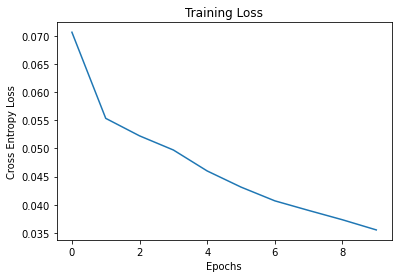

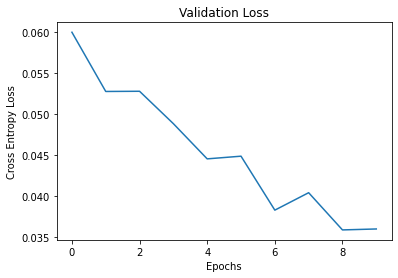

In [ ]:
def plot_losses(losses, title):
  plt.plot(losses)
  plt.xlabel("Epochs")
  plt.ylabel("Cross Entropy Loss")
  plt.title(title)
  plt.show()

plot_losses(losses, title='Training Loss')
plot_losses(valid_losses, title='Validation Loss')

## Test the Model

In [ ]:
def getPredsFromLogits(logits):
  # Using softmax to get an array that sums to 1, and then getting the index with the highest value
  return torch.nn.functional.softmax(logits, dim=1).argmax(dim=1)

def test(loaders, model, criterion, device):

  # monitor test loss and accuracy
  test_loss = 0.0
  correct = 0
  total = 0

  model.eval()
  for images, labels in loaders['test']:
    # move to GPU if available
    images, labels = images.to(device), labels.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(images)
    # calculate the loss
    loss = criterion(output, labels)
    # update average test loss 
    test_loss += loss.data
    # convert output probabilities to predicted class
    pred = getPredsFromLogits(output)
    # compare predictions to true label
    correct += pred.eq(labels).sum().item()
    total += pred.shape[0]
  
  test_loss /= total
            
  print('Test Loss: {:.6f}\n'.format(test_loss))

  print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

test(loaders, model, criterion, device)

Test Loss: 0.032939


Test Accuracy: 79% (3367/4233)


## How to load a saved model

It is useful to save our trained model (i.e., like the weights it learned during training) and then reuse it later to prevent having to retrain it, which can take a very long time. This is really important when you want to work on your own projects!

In [ ]:
# First create a new instance of the model class
saved_model = CNN_Model()

# Second, load state dict in the file that was saved then it should work as normal!
saved_model.load_state_dict(torch.load('saved_model.pt'))

# It will be downloaded to your computer as an example for you to save yours later
files.download('saved_model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary

Our model here was able to get a test accuracy of 79%, but it probably can be improved on. What do you think can be changed to improve the test results? You can perhaps add more layers, change the learning rate or optimizer. Something I noticed is that may have perhaps overfitted on the images of healthy lungs that it didn't perform well on lungs that were infected. This provides an area of open creativity for you to explore to better this model.

I invite you to use this model as a starting point for your own CNN medical diagnosis model. See if you can updated an get even better results! Feel free to use it on another medical imaging dataset that interest you.

Here are some links to more datasets to consider:

1. [Stanford's Center for Artificial Intelligence in Medicine and Imaging](https://aimi.stanford.edu/research/public-datasets) (Highly-Recommend this one)
2. [Open-Access Medical Image Repositories](https://www.aylward.org/notes/open-access-medical-image-repositories)